### Tahapan Preprocessing
1. **Load dataset** (wine merah + putih).  
2. **Menangani Outlier** dengan metode IQR → supaya nilai ekstrim tidak mengganggu distribusi data.  
3. **Feature Engineering**: menambahkan fitur baru `sugar_ratio = residual sugar / density`.  
4. **Mapping Target (quality → binary)**:  
   - 0 = Tidak Bagus (quality ≤ 6)  
   - 1 = Bagus (quality ≥ 7)  
5. **Membagi data** menjadi train & test.  
6. **Scaling fitur** (fit hanya di data train, lalu transform ke data test).  
7. **SMOTE balancing** pada data train agar kelas seimbang.  


In [55]:
import pandas as pd 

In [56]:
df_white = pd.read_csv("winequality-white.csv", delimiter=";")
df_red = pd.read_csv("winequality-red.csv", delimiter=";")

df = pd.concat([df_red, df_white], axis=0)
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6497 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 659.9 KB


In [58]:
##CEK NUll
print(df.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [59]:
## Cek Distribusi Quality Wine
print("Wine Quality Distribution:")
print(df["quality"].value_counts().sort_index())

Wine Quality Distribution:
quality
3      30
4     216
5    2138
6    2836
7    1079
8     193
9       5
Name: count, dtype: int64


In [60]:
import numpy as np

df_clean = df.copy()
for col in df_clean.columns:
    if col != "quality":  # skip kolom target
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Winsorizing
        df_clean[col] = np.where(
            df_clean[col] < lower_bound, lower_bound,
            np.where(df_clean[col] > upper_bound, upper_bound, df_clean[col])
        )

print("Outlier sudah ditangani.")
df_clean.describe()


Outlier sudah ditangani.


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.142173,0.332612,0.316180,5.407727,0.053230,30.339541,115.671926,0.994689,3.217638,0.526667,10.491624,5.818378
std,1.066080,0.144376,0.131856,4.613702,0.021289,16.904806,56.256191,0.002942,0.157901,0.131196,1.192136,0.873255
min,4.450000,0.080000,0.040000,0.600000,0.009000,1.000000,6.000000,0.987110,2.795000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,9.650000,0.655000,0.600000,17.550000,0.105500,77.000000,274.500000,1.003965,3.635000,0.855000,14.000000,9.000000


In [61]:
df_clean["sugar_ratio"] = df_clean["residual sugar"] / df_clean["density"]
print("Fitur sugar_ratio berhasil ditambahkan")
df_clean.head

Fitur sugar_ratio berhasil ditambahkan


<bound method NDFrame.head of       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0              7.40             0.655         0.04             1.9      0.076   
1              7.80             0.655         0.04             2.6      0.098   
2              7.80             0.655         0.04             2.3      0.092   
3              9.65             0.280         0.56             1.9      0.075   
4              7.40             0.655         0.04             1.9      0.076   
...             ...               ...          ...             ...        ...   
4893           6.20             0.210         0.29             1.6      0.039   
4894           6.60             0.320         0.36             8.0      0.047   
4895           6.50             0.240         0.19             1.2      0.041   
4896           5.50             0.290         0.30             1.1      0.022   
4897           6.00             0.210         0.38             0.8      0.020  

In [62]:
def map_quality(q):
    return 0 if q <= 6 else 1

df_clean["quality_label"] = df_clean["quality"].apply(map_quality)
df_clean.drop("quality", axis=1, inplace=True)

print("Distribusi kelas setelah mapping:")
print(df_clean["quality_label"].value_counts())


Distribusi kelas setelah mapping:
quality_label
0    5220
1    1277
Name: count, dtype: int64


Since the distribution is unbalanced, we map it into 2 or 3 categories

Split training data, in this case we do a 80/20 split

In [63]:
from sklearn.model_selection import train_test_split

X = df_clean.drop("quality_label", axis=1)
y = df_clean["quality_label"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Distribusi kelas pada data train:", np.bincount(y_train))
print("Distribusi kelas pada data test :", np.bincount(y_test))


Distribusi kelas pada data train: [4176 1021]
Distribusi kelas pada data test : [1044  256]


Tried 3 NaiveBayes models to demonstrate how each model would perform on a continuous data

In [ ]:
from imblearn.pipeline import Pipeline   # gunakan imblearn
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Binarizer
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


pipe_g = Pipeline([
    ('scale', StandardScaler()),
    ('smote', SMOTE(random_state=42)),   # tambahin SMOTE
    ('clf', GaussianNB())
])
pipe_g.fit(X_train, y_train)
g_pred = pipe_g.predict(X_test)


pipe_m = Pipeline([
    ('minmax', MinMaxScaler()),          # fitur ke [0,1]
    ('smote', SMOTE(random_state=42)),
    ('clf', MultinomialNB())
])
pipe_m.fit(X_train, y_train)
m_pred = pipe_m.predict(X_test)


pipe_b = Pipeline([
    ('bin', Binarizer(threshold=X_train.mean().mean())),  # binarisasi fitur
    ('smote', SMOTE(random_state=42)),
    ('clf', BernoulliNB())
])
pipe_b.fit(X_train, y_train)
b_pred = pipe_b.predict(X_test)


pipe_l = Pipeline([
    ('scale', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('clf', LogisticRegression(max_iter=1000))
])
pipe_l.fit(X_train, y_train)
l_pred = pipe_l.predict(X_test)


In [65]:
import pandas as pd
from sklearn.metrics import classification_report

# Ringkasan akurasi tiap model
results = [
    ("GaussianNB", accuracy_score(y_test, g_pred)),
    ("MultinomialNB", accuracy_score(y_test, m_pred)),
    ("BernoulliNB", accuracy_score(y_test, b_pred)),
    ("Logistic Regression", accuracy_score(y_test, l_pred))
]

summary = pd.DataFrame(results, columns=['Model', 'Accuracy']) \
            .sort_values('Accuracy', ascending=False).reset_index(drop=True)

print("=== Ringkasan Akurasi ===")
print(summary)

# Classification report tiap model
print("\n=== GaussianNB Report ===")
print(classification_report(y_test, g_pred))

print("\n=== MultinomialNB Report ===")
print(classification_report(y_test, m_pred))

print("\n=== BernoulliNB Report ===")
print(classification_report(y_test, b_pred))

print("\n=== Logistic Regression Report ===")
print(classification_report(y_test, l_pred))


=== Ringkasan Akurasi ===
                 Model  Accuracy
0  Logistic Regression  0.710000
1        MultinomialNB  0.699231
2           GaussianNB  0.676923
3          BernoulliNB  0.357692

=== GaussianNB Report ===
              precision    recall  f1-score   support

           0       0.91      0.66      0.77      1044
           1       0.35      0.73      0.47       256

    accuracy                           0.68      1300
   macro avg       0.63      0.70      0.62      1300
weighted avg       0.80      0.68      0.71      1300


=== MultinomialNB Report ===
              precision    recall  f1-score   support

           0       0.92      0.69      0.79      1044
           1       0.37      0.75      0.49       256

    accuracy                           0.70      1300
   macro avg       0.64      0.72      0.64      1300
weighted avg       0.81      0.70      0.73      1300


=== BernoulliNB Report ===
              precision    recall  f1-score   support

           0   

In [66]:
models = {
    "GaussianNB":   {"pipe": pipe_g, "y_pred": g_pred},
    "MultinomialNB":{"pipe": pipe_m, "y_pred": m_pred},
    "BernoulliNB":  {"pipe": pipe_b, "y_pred": b_pred},
    "LogisticRegression": {"pipe": pipe_l, "y_pred" : l_pred},
}

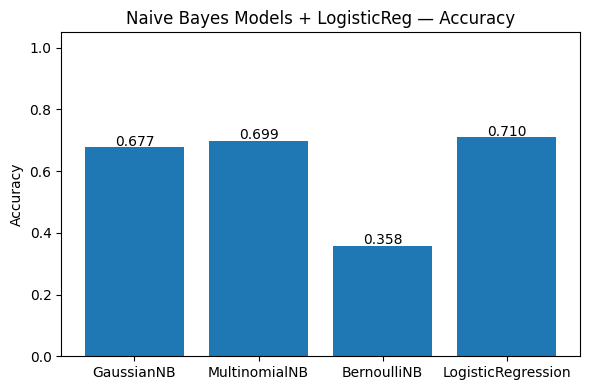

In [67]:
import matplotlib.pyplot as plt

accs = {name: accuracy_score(y_test, m["y_pred"]) for name, m in models.items()}

plt.figure(figsize=(6,4))
names, vals = zip(*accs.items())
bars = plt.bar(names, vals)
for b, v in zip(bars, vals):
    plt.text(b.get_x() + b.get_width()/2, v + 0.005, f"{v:.3f}", ha="center", fontsize=10)
plt.ylim(0, 1.05)
plt.ylabel("Accuracy")
plt.title("Naive Bayes Models + LogisticReg — Accuracy")
plt.tight_layout()
plt.show()

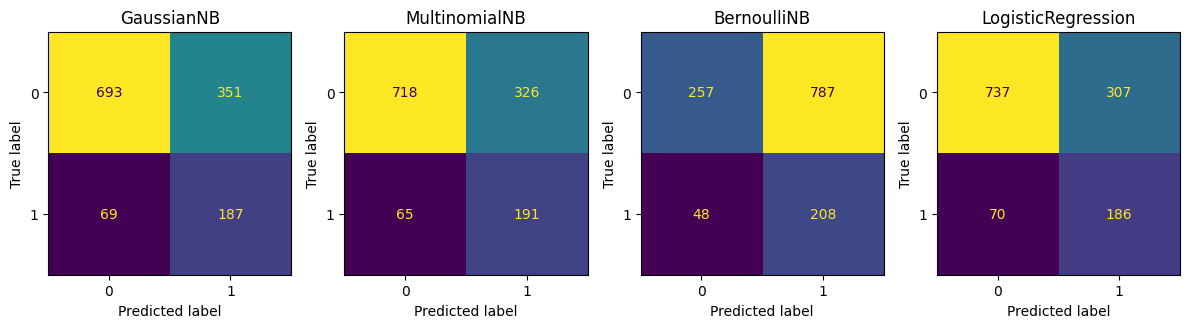

In [68]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

fig, axes = plt.subplots(1, 4, figsize=(12, 3.6))
for ax, (name, m) in zip(axes, models.items()):
    cm = confusion_matrix(y_test, m["y_pred"])
    disp = ConfusionMatrixDisplay(cm)
    disp.plot(ax=ax, colorbar=False)
    ax.set_title(name)
plt.tight_layout()
plt.show()

## Kesimpulan

Berdasarkan hasil eksperimen sebelum dan sesudah preprocessing tambahan:

1. **Akurasi Model**
   - Terlihat ada **penurunan akurasi** pada beberapa model setelah dilakukan preprocessing.  
   - Hal ini wajar terjadi karena sebelumnya model lebih “diuntungkan” oleh distribusi data yang imbalance (lebih banyak kelas mayoritas).  

2. **Precision dan Recall**
   - Setelah preprocessing (khususnya dengan penerapan **SMOTE**), terjadi **peningkatan nilai precision dan recall**, terutama pada kelas minoritas.  
   - Model menjadi lebih seimbang dalam mengenali kedua kelas, tidak hanya fokus pada kelas mayoritas.  

3. **Perbandingan Model**
   - **Logistic Regression** tetap menjadi model dengan performa terbaik secara keseluruhan.  
   - **GaussianNB** juga menunjukkan peningkatan yang stabil.  
   - **MultinomialNB** dan **BernoulliNB** kurang cocok untuk dataset ini, terlihat dari confusion matrix yang cenderung bias ke satu kelas saja.  

### Inti
- **Sebelum preprocessing:** Akurasi lebih tinggi, tetapi precision dan recall (terutama kelas minoritas) rendah → model bias terhadap kelas mayoritas.  
- **Sesudah preprocessing:** Akurasi sedikit menurun, tetapi precision dan recall naik → model lebih adil dan mampu mengenali kelas minoritas dengan lebih baik.  

Dengan demikian, preprocessing yang dilakukan terbukti efektif dalam meningkatkan kualitas prediksi secara menyeluruh, meskipun mengorbankan sedikit akurasi.
